#### 1. Import Necessary Packages and Data

In [1]:
# GENERAL
import pandas as pd                                    #Used to read data
import numpy as np                                     #Used to compute Root Mean Square Error
import matplotlib.pyplot as plt                        #Used to visualize data
import seaborn as sns                                  #Used to visualize data
from sklearn.model_selection import train_test_split   #Used to split the data into test and train sets 
from sklearn import metrics                            #Used to compute R^2, Mean Abs Error and Mean Square Error  
from sklearn.metrics import ConfusionMatrixDisplay     #Used to visualize data

# MODEL SPECIFIC
from sklearn.cross_decomposition import PLSRegression   #Used to fit and predict a PLS-DA Model 

# DATA
inputData = pd.read_excel(r'/Users/emilyknight/Documents/BMEN415 Final Project/CTG.xlsx').sample(frac = 1) #Import data

inputData.head() #Print complete dataset to console

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,NSP
370,138,0,1,0,68,0.3,21,7.2,0,0,0,2
1449,147,5,0,4,36,1.2,0,4.8,0,0,0,1
916,122,2,0,1,27,1.6,0,3.2,0,0,1,1
1494,132,6,0,9,33,1.2,0,14.0,0,0,0,1
1147,122,0,0,2,18,1.9,0,8.8,3,0,0,1


#### 2. Select and Split Input and Output Vectors

In [2]:
# Select Input Vector, X, and Output Vector, y
X = inputData.drop(columns=['NSP']) #Input vector is all data but the Fetal State Class Code
y = inputData['NSP'] #Output data is the Fetal State Class Code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #Split vectors, 20% will be used for testing 

#### 3. Instantiate and Fit Models

In [3]:
pls_da = PLSRegression(n_components=6, scale=False) #PLS Model with 2 Components

pls_da.fit(X_train, y_train) #Fit the Model given the PLS Function

PLSRegression(n_components=6, scale=False)

#### 4. Score The Determination of the Prediction

In [4]:
pls_da.score(X_test,y_test)

0.3644632571219071

#### 5. Test and Quantify Model Performance

In [5]:
pls_predictions = (pls_da.predict(X_test)[:,0]).astype('uint8') #Create predictions based on the PLS model with unseen test data 
pls_predictions += 1

#Compare the predictions to the known test values
print(metrics.confusion_matrix(y_test, pls_predictions))

[[ 93 248   1]
 [  0  46   7]
 [  0  24   7]]


#### 6. Visualize Data

Confusion matrix, without normalization
[[ 93 248   1]
 [  0  46   7]
 [  0  24   7]]
Normalized confusion matrix
[[0.27 0.73 0.  ]
 [0.   0.87 0.13]
 [0.   0.77 0.23]]


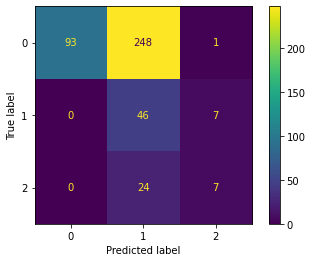

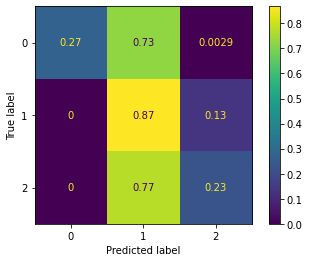

In [6]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    cm = metrics.confusion_matrix(y_test, pls_predictions, normalize = normalize)
    disp = ConfusionMatrixDisplay(cm)

    print(title)
    print(disp.confusion_matrix)
    disp.plot()

plt.show()